In [ ]:
# modules
import warnings, os
import pandas as pd
import seaborn as sns
from pandasgui import show

# Custom classes
from DFInfo import DataFrameInfo
from Connector import RDSDatabaseConnector
from GraphPlotter import Plotter
from DFTransform import DataFrameTransform
from DTransform import DataTransform


In [ ]:
# to stop spam of deprecated feature
warnings.simplefilter(action="ignore", category=FutureWarning) 

#creates all the classes
rdsdbc = RDSDatabaseConnector()
dtransformer = DataTransform()
dtinfo = DataFrameInfo()
dftransformer = DataFrameTransform()
plotter = Plotter()

In [ ]:
available_list = ["policy_code"]
string_list = ["policy_code", "term"]
strip_list = ["term"]
qualitative_list = ["purpose", "grade", "sub_grade","home_ownership", "verification_status", "loan_status", "payment_plan", "application_type", "employment_length"]
ignore_transform_list = ["id", "member_id"]
outlier_columns = ["funded_amount", "funded_amount_inv", "installment", "open_accounts", "delinq_2yrs", "total_accounts", "total_payment", "total_payment_inv", "total_rec_prncp", "total_rec_int", "last_payment_amount"]


In [ ]:
dataframe = rdsdbc.download_df()
#connects to online server, downloads the database, and stores in a file called loan_payments.csv

In [ ]:
show(dataframe) # original untouched dataframe

In [ ]:
#calls the main function in each data analysis class
dtransformer.set_available_list(available_list)
dtransformer.set_string_list(string_list)
dtransformer.set_strip_list(strip_list)
dtransformer.set_qualitative_list(qualitative_list)

dataframe = dtransformer.call_all_cleaners(dataframe)
####dataframe = dtinfo.call_all_information(dataframe)

In [ ]:
#calls the plotter and visualises the null value removal
nulls_before = dftransformer.count_nulls(dataframe)
dataframe = dftransformer.drop_columns(dataframe)
dataframe = dftransformer.impute_columns(dataframe)
nulls_after = dftransformer.count_nulls(dataframe)

plotter.plot_nulls_before_after(nulls_before, nulls_after)

In [ ]:
skewed_columns = dtransformer.get_skewed_columns(dataframe, qualitative_list, 0.5)
skewed_dataframe = dtransformer.get_skewed_dataframe(dataframe, skewed_columns)
unskewed_dataframe = dftransformer.remove_skewness(dataframe, qualitative_list)


plotter.plot_skewed_vs_unskewed_graph(skewed_dataframe.skew(), unskewed_dataframe.skew())

In [ ]:
combined_df = dftransformer.merge_dataframes(dataframe, unskewed_dataframe)
combined_df.to_csv(os.path.join("script_data", "combined_dataframe.csv"), index=False)
dataframe = combined_df
show(dataframe)
print(dataframe["payment_plan"])


In [ ]:

plotter.visualise_outliers(dataframe, outlier_columns)
before = dataframe
drop_outlier_dictionary = dftransformer.find_closest_outliers(dataframe, outlier_columns)
dataframe = dftransformer.drop_outside_bounds(dataframe, drop_outlier_dictionary)
after = dataframe
before_count = dftransformer.calculate_outlier_counts(before, outlier_columns)


In [23]:
outlier_count_before = pd.DataFrame(dftransformer.calculate_outlier_counts(before, outlier_columns))

outlier_count_after = pd.DataFrame(dftransformer.calculate_outlier_counts(after, outlier_columns))

ValueError: If using all scalar values, you must pass an index

AttributeError: 'dict' object has no attribute 'plot'

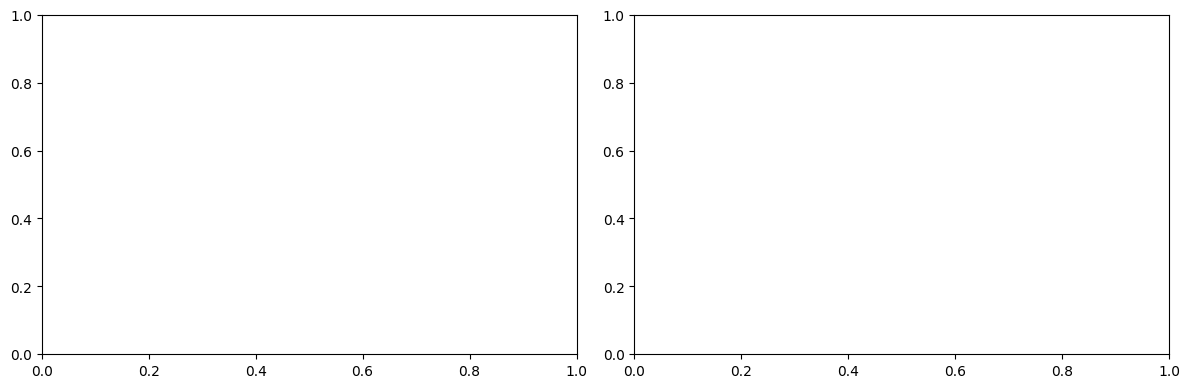

In [18]:
plotter.plot_outliers_before_after(outlier_count_before, outlier_count_after)